## Expresso Churn Prediction

In this checkpoint, I am going to work on the **'Expresso churn'** dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

**Dataset description:** Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

➡️ Dataset link

https://i.imgur.com/OQKLgVy.png

**Instructions**

1. Install the necessary packages
2. Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally)
5. Add input fields for your features and a validation button at the end of the form
6. Import your ML model into the streamlit application and start making predictions given the provided features values

#### Importing necessary libraries

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Loading the dataset

In [7]:
df = pd.read_csv("C:/Users/USER/Desktop/GMC/Checkpoints/Streamlit_Expresso_churn_dataset.csv")

In [9]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [13]:
df.shape

(1048575, 19)

#### Sampling the dataset

In [16]:
# Sample 50000 random rows from the cleaned DataFrame
df_sampled = df.sample(n=50000, random_state=42)

#### Overview of the dataset

In [19]:
df_sampled.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
781974,5cfd3c8fa521f8b3f246cac6a7509f8294e04b99,DAKAR,K > 24 month,3400.0,13.0,3399.0,1133.0,18.0,1212.0,NaN,1.0,0.0,NaN,NaN,NO,33,"Data:150F=SPPackage1,24H",9.0,0
937737,6f8afdcea2124e0d4e4c1f831ef7dedeb786add2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NO,12,NaN,NaN,0
907828,6bfde72d8ada973068eadd16bffd77fae0d9dc76,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,7.0,NaN,6.0,51.0,NaN,1.0,NaN,NO,35,All-net 500F=2000F;5d,3.0,0
784628,5d4c23dc2aac6ed00598d851e7b0acf84941fa7d,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,10.0,11.0,NaN,NaN,NaN,NaN,NO,24,NaN,NaN,0
662460,4eb92e7f3fa327f3a45cf00424bdfab700bdfd7e,DAKAR,K > 24 month,3500.0,7.0,3254.0,1085.0,10.0,NaN,163.0,43.0,4.0,NaN,NaN,NO,45,All-net 500F=2000F;5d,3.0,0


In [21]:
df_sampled.shape

(50000, 19)

In [23]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 781974 to 217021
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         50000 non-null  object 
 1   REGION          30300 non-null  object 
 2   TENURE          50000 non-null  object 
 3   MONTANT         32416 non-null  float64
 4   FREQUENCE_RECH  32416 non-null  float64
 5   REVENUE         33169 non-null  float64
 6   ARPU_SEGMENT    33169 non-null  float64
 7   FREQUENCE       33169 non-null  float64
 8   DATA_VOLUME     25424 non-null  float64
 9   ON_NET          31821 non-null  float64
 10  ORANGE          29180 non-null  float64
 11  TIGO            19965 non-null  float64
 12  ZONE1           3942 non-null   float64
 13  ZONE2           3080 non-null   float64
 14  MRG             50000 non-null  object 
 15  REGULARITY      50000 non-null  int64  
 16  TOP_PACK        29084 non-null  object 
 17  FREQ_TOP_PACK   29084 non-null

#### Summary Statistics

In [26]:
df_sampled.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,32416.000000,32416.000000,33169.000000,33169.000000,33169.000000,25424.000000,31821.000000,29180.000000,19965.000000,3942.000000,3080.000000,50000.000000,29084.000000,50000.000000
mean,5479.309107,11.376512,5458.425035,1819.480177,13.815189,3360.839600,268.229094,95.331700,22.295667,8.790969,7.180844,28.046800,9.116559,0.188800
std,7509.597662,13.024165,7714.482988,2571.488711,14.498442,12361.380515,847.255002,214.516947,54.921137,58.810940,30.480542,22.224347,11.973226,0.391354
min,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,280.000000,26.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7300.000000,15.000000,7300.000000,2433.000000,19.000000,2995.250000,154.000000,98.000000,20.000000,3.000000,5.000000,50.000000,12.000000,0.000000
max,470000.000000,101.000000,532177.000000,177392.000000,91.000000,758167.000000,20465.000000,6788.000000,1526.000000,2507.000000,820.000000,62.000000,206.000000,1.000000


#### Checking for missing values and duplicates

In [29]:
df_sampled.isnull().sum()

user_id               0
REGION            19700
TENURE                0
MONTANT           17584
FREQUENCE_RECH    17584
REVENUE           16831
ARPU_SEGMENT      16831
FREQUENCE         16831
DATA_VOLUME       24576
ON_NET            18179
ORANGE            20820
TIGO              30035
ZONE1             46058
ZONE2             46920
MRG                   0
REGULARITY            0
TOP_PACK          20916
FREQ_TOP_PACK     20916
CHURN                 0
dtype: int64

##### Replacing missing values

In [32]:
df_sampled['MONTANT'].fillna(df_sampled['MONTANT'].median(), inplace=True)
df_sampled['FREQUENCE_RECH'].fillna(df_sampled['FREQUENCE_RECH'].median(), inplace=True)
df_sampled['REVENUE'].fillna(df_sampled['REVENUE'].median(), inplace=True)
df_sampled['ARPU_SEGMENT'].fillna(df_sampled['ARPU_SEGMENT'].median(), inplace=True)
df_sampled['FREQUENCE'].fillna(df_sampled['FREQUENCE'].median(), inplace=True)
df_sampled['DATA_VOLUME'].fillna(df_sampled['DATA_VOLUME'].median(), inplace=True)
df_sampled['ON_NET'].fillna(df_sampled['ON_NET'].median(), inplace=True)
df_sampled['ORANGE'].fillna(df_sampled['ORANGE'].median(), inplace=True)
df_sampled['TIGO'].fillna(df_sampled['TIGO'].median(), inplace=True)
df_sampled['ZONE1'].fillna(df_sampled['ZONE1'].median(), inplace=True)
df_sampled['ZONE2'].fillna(df_sampled['ZONE2'].median(), inplace=True)
df_sampled['FREQ_TOP_PACK'].fillna(df_sampled['FREQ_TOP_PACK'].median(), inplace=True)

In [34]:
# Replace missing values for categorical columns with the mode
df_sampled['REGION'].fillna(df_sampled['REGION'].mode()[0], inplace=True)
df_sampled['TOP_PACK'].fillna(df_sampled['TOP_PACK'].mode()[0], inplace=True)


In [36]:
df_sampled.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [38]:
df_sampled.duplicated().sum()

0

no duplicates in the dataset cool!

###### Churn Distribution Across Region

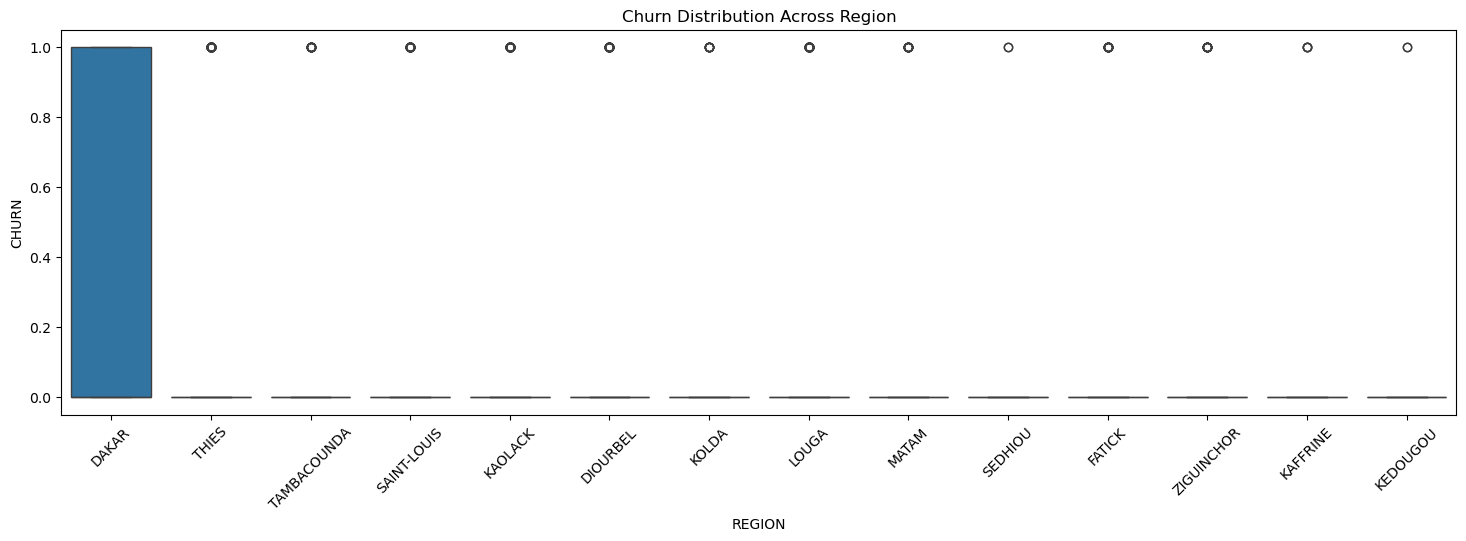

In [42]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='REGION', y='CHURN', data=df_sampled)
plt.title('Churn Distribution Across Region')
plt.xticks(rotation=45)
plt.show()


###### plot features against CHURN and identify data points that are far away from the bulk of the data.

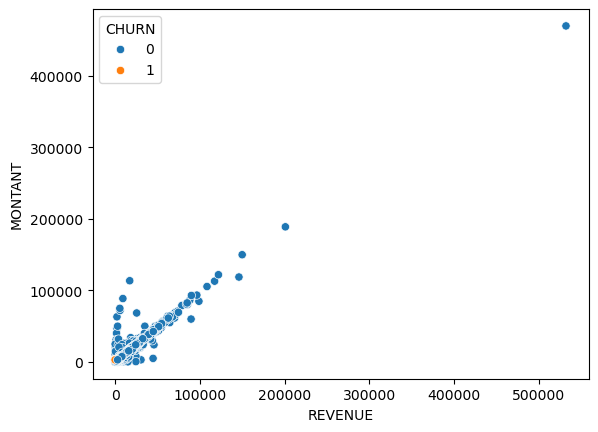

In [45]:
sns.scatterplot(x='REVENUE', y='MONTANT', data=df_sampled, hue='CHURN')
plt.show()

In [46]:
from scipy import stats
z_scores = stats.zscore(df_sampled['MONTANT'])
df_sampled[(z_scores > 3) | (z_scores < -3)]


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
296366,23500727079f1d7ca6cfc28cf0eb75bea9126d56,DAKAR,K > 24 month,31500.0,12.0,31629.0,10543.0,17.0,23407.0,2854.0,1227.0,124.0,1.0,2.0,NO,62,All-net 500F=2000F;5d,6.0,0
863812,66be04d42519f73a7af6892d399c481ce1c54705,LOUGA,K > 24 month,43000.0,82.0,44500.0,14833.0,78.0,280.0,1095.0,3567.0,67.0,1.0,2.0,NO,62,Jokko_Daily,88.0,0
800375,5f26a66a11b961ca27081eb95d1004d129de1bff,TAMBACOUNDA,K > 24 month,52350.0,87.0,53849.0,17950.0,82.0,59.0,4406.0,3049.0,234.0,1.0,4.0,NO,62,Jokko_Daily,97.0,0
556681,422609670ffae1a8441100df7966548a3e350aeb,DAKAR,K > 24 month,28200.0,54.0,27545.0,9182.0,57.0,26.0,573.0,1573.0,28.0,1.0,2.0,NO,62,Jokko_Daily,51.0,0
417457,31a7304ef67a061589c279394f427d02a84b4ba8,DAKAR,K > 24 month,25500.0,35.0,26500.0,8833.0,37.0,0.0,681.0,1227.0,338.0,1.0,2.0,NO,61,Jokko_Daily,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363489,2b3e29671e401d8125fd2ff0831e4a375aa4ff45,DAKAR,K > 24 month,27450.0,56.0,28818.0,9606.0,65.0,579.0,3374.0,1433.0,1.0,1.0,2.0,NO,62,Jokko_Daily,37.0,0
162185,13564de4ff301e79a9411717a8780eff591f9ac3,SAINT-LOUIS,K > 24 month,32500.0,33.0,32586.0,10862.0,33.0,280.0,2382.0,29.0,6.0,1.0,2.0,NO,62,On-net 1000F=10MilF;10d,30.0,0
603467,47b44ba8b8623285c7a9933d7cce0fdb4db52fc3,SAINT-LOUIS,K > 24 month,25500.0,42.0,25502.0,8501.0,42.0,22411.0,748.0,268.0,28.0,1.0,2.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,19.0,0
531581,3f2f439c3c6d6208727eda69536b9c83bad0d209,DAKAR,K > 24 month,69500.0,40.0,74773.0,24924.0,74.0,0.0,16419.0,20.0,2.0,1.0,2.0,NO,50,Mixt 250F=Unlimited_call24H,56.0,0


All users with these outlier MONTANT values have not churned (CHURN = 0). This may suggest that higher MONTANT values are correlated with retention.

In [50]:
df_sampled['REGION'].value_counts()

REGION
DAKAR          31698
THIES           4066
SAINT-LOUIS     2716
LOUGA           2304
KAOLACK         2280
DIOURBEL        1656
TAMBACOUNDA     1324
KAFFRINE         979
KOLDA            895
FATICK           850
MATAM            655
ZIGUINCHOR       483
SEDHIOU           69
KEDOUGOU          25
Name: count, dtype: int64

In [52]:
df_sampled['TENURE'].value_counts()

TENURE
K > 24 month     47445
I 18-21 month     1058
H 15-18 month      603
G 12-15 month      355
J 21-24 month      298
F 9-12 month       192
E 6-9 month         40
D 3-6 month          9
Name: count, dtype: int64

In [54]:
# Mean encoding for TENURE based on REVENUE
mean_encoded = df_sampled.groupby('TENURE')['REVENUE'].mean()
df_sampled['TENURE_encoded'] = df_sampled['TENURE'].map(mean_encoded)

In [56]:
df_sampled.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE_encoded
781974,5cfd3c8fa521f8b3f246cac6a7509f8294e04b99,DAKAR,K > 24 month,3400.0,13.0,3399.0,1133.0,18.0,1212.0,26.0,1.0,0.0,1.0,2.0,NO,33,"Data:150F=SPPackage1,24H",9.0,0,4655.340668
937737,6f8afdcea2124e0d4e4c1f831ef7dedeb786add2,DAKAR,K > 24 month,3000.0,6.0,3000.0,1000.0,9.0,0.0,0.0,29.0,6.0,1.0,2.0,NO,12,All-net 500F=2000F;5d,5.0,0,4655.340668
907828,6bfde72d8ada973068eadd16bffd77fae0d9dc76,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,7.0,280.0,6.0,51.0,6.0,1.0,2.0,NO,35,All-net 500F=2000F;5d,3.0,0,4655.340668
784628,5d4c23dc2aac6ed00598d851e7b0acf84941fa7d,DAKAR,K > 24 month,3000.0,6.0,3000.0,1000.0,9.0,10.0,11.0,29.0,6.0,1.0,2.0,NO,24,All-net 500F=2000F;5d,5.0,0,4655.340668
662460,4eb92e7f3fa327f3a45cf00424bdfab700bdfd7e,DAKAR,K > 24 month,3500.0,7.0,3254.0,1085.0,10.0,280.0,163.0,43.0,4.0,1.0,2.0,NO,45,All-net 500F=2000F;5d,3.0,0,4655.340668


In [58]:
# Selecting only numeric columns for correlation
numeric_df = df_sampled.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

In [60]:
correlation_matrix

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_encoded
MONTANT,1.000000,0.744274,0.978998,0.978998,0.731455,0.282261,0.339301,0.625300,0.409503,0.398783,0.185922,0.456488,0.693314,-0.137084,0.037432
FREQUENCE_RECH,0.744274,1.000000,0.736996,0.736995,0.951725,0.174093,0.419571,0.508677,0.382717,0.060046,0.075391,0.529532,0.864350,-0.169073,0.014379
REVENUE,0.978998,0.736996,1.000000,1.000000,0.733610,0.286566,0.340396,0.621974,0.405605,0.421485,0.173821,0.457579,0.694732,-0.138468,0.037354
ARPU_SEGMENT,0.978998,0.736995,1.000000,1.000000,0.733608,0.286567,0.340396,0.621975,0.405606,0.421486,0.173821,0.457579,0.694732,-0.138468,0.037354
FREQUENCE,0.731455,0.951725,0.733610,0.733608,1.000000,0.186442,0.405287,0.460301,0.344154,0.073257,0.082652,0.532378,0.836243,-0.158219,0.013407
DATA_VOLUME,0.282261,0.174093,0.286566,0.286567,0.186442,1.000000,0.007936,0.044061,0.031850,0.003488,0.009303,0.199807,0.137102,-0.062690,0.003014
ON_NET,0.339301,0.419571,0.340396,0.340396,0.405287,0.007936,1.000000,0.244460,0.186413,0.023274,0.001015,0.286379,0.381179,-0.102627,0.008852
ORANGE,0.625300,0.508677,0.621974,0.621975,0.460301,0.044061,0.244460,1.000000,0.444958,0.045191,0.039123,0.309231,0.552631,-0.110488,0.054962
TIGO,0.409503,0.382717,0.405605,0.405606,0.344154,0.031850,0.186413,0.444958,1.000000,0.018957,0.016505,0.230816,0.401816,-0.084164,0.014139
ZONE1,0.398783,0.060046,0.421485,0.421486,0.073257,0.003488,0.023274,0.045191,0.018957,1.000000,0.017542,0.037551,0.100099,-0.013468,0.002578


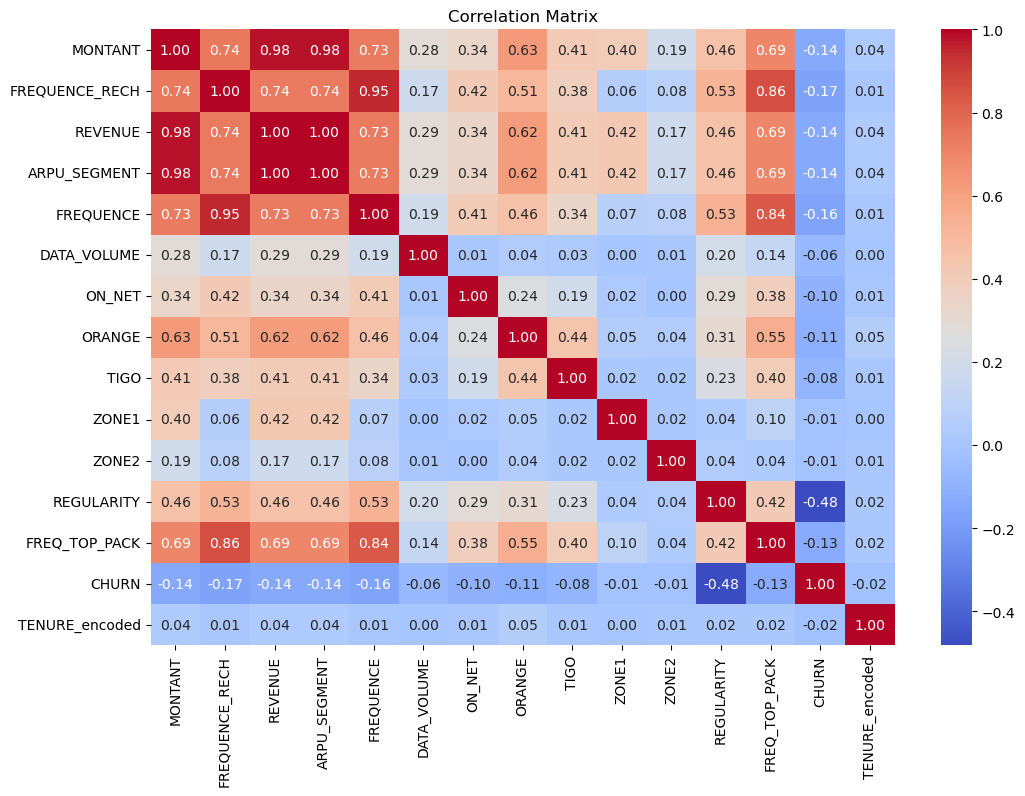

In [62]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Modelling

Selecting my features and splitting the data into training and test sets

In [66]:
# Split features (X) and target (y)
X = df_sampled.drop(columns=[ "CHURN", "TOP_PACK", "MRG", "user_id", "REGION", "TENURE"])
y = df_sampled['CHURN']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print(X_train.columns)

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK', 'TENURE_encoded'],
      dtype='object')


Scaling my data to ensure that each feature contributes equally to the distance calculations or the optimization process.

In [71]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

#### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [77]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
0.8306
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      8193
           1       0.52      0.75      0.61      1807

    accuracy                           0.83     10000
   macro avg       0.73      0.80      0.75     10000
weighted avg       0.86      0.83      0.84     10000

Confusion Matrix:
[[6954 1239]
 [ 455 1352]]


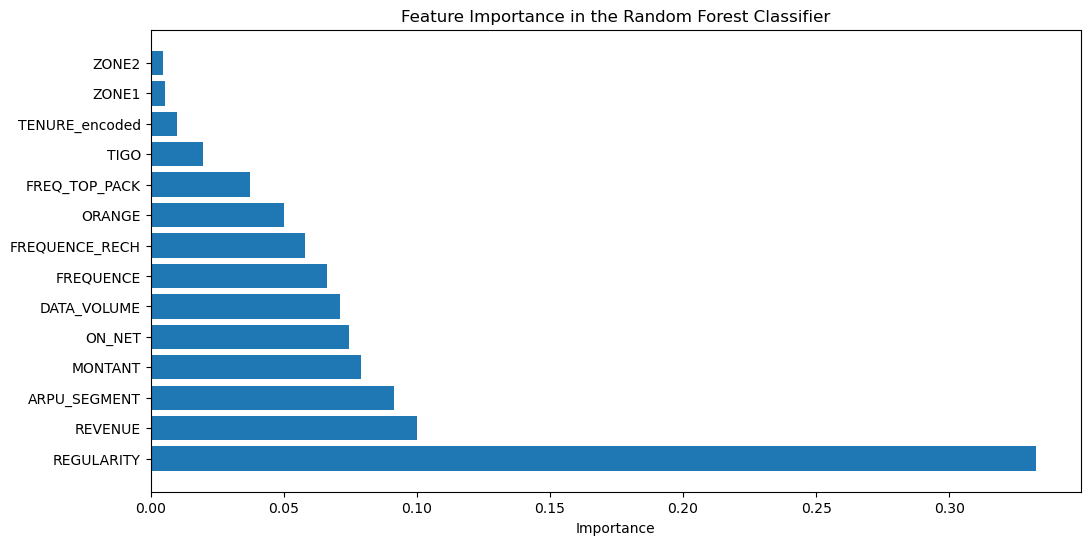

In [78]:
# Feature Importance
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in the Random Forest Classifier')
plt.show()

Based on the feature Importance my new feature would be

'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY', 'FREQ_TOP_PACK'

### Light Gradient Boosting(LGBM)

In [85]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [87]:
X = df_sampled[['FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY', 'FREQ_TOP_PACK']]
y = df_sampled['CHURN']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
lgbm_model = LGBMClassifier(n_estimators=100, early_stopping_rounds=10, eval_metric='auc', verbose=1)
# Fit the model
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc')

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 7633, number of negative: 32367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1358
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190825 -> initscore=-1.444658
[LightGBM] [Info] Start training from score -1.444658
Training until valid

LGBMClassifier(early_stopping_rounds=10, eval_metric='auc', verbose=1)

In [91]:
# Make predictions
y_pred = lgbm_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

[LightGBM] [Warning] Unknown parameter: eval_metric


In [93]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8193
           1       0.66      0.55      0.60      1807

    accuracy                           0.87     10000
   macro avg       0.78      0.74      0.76     10000
weighted avg       0.86      0.87      0.86     10000

Confusion Matrix:
[[7680  513]
 [ 810  997]]


### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [98]:
log_model= LogisticRegression(penalty = 'l1', C = 0.5, solver = 'liblinear')
log_model.fit(X_train,y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [100]:
logy_pred = log_model.predict(X_test)

In [102]:
ACC = accuracy_score(logy_pred, y_test)
conf_mat = confusion_matrix(logy_pred, y_test)
class_report = classification_report(logy_pred, y_test)
print(ACC)
print(conf_mat)
print(class_report)

0.8623
[[7616  800]
 [ 577 1007]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      8416
           1       0.56      0.64      0.59      1584

    accuracy                           0.86     10000
   macro avg       0.74      0.77      0.76     10000
weighted avg       0.87      0.86      0.87     10000



##### LightGBM stands out as the best model overall based on my results. Here's why:

Accuracy: LightGBM has the highest accuracy (0.87), meaning it predicts both classes better overall.

Precision (Class 1): LightGBM also has the highest precision (0.69) for class 1, meaning it minimizes false positives better than the other models.

Balanced Performance: Although its recall (0.55) for class 1 is lower than Random Forest (0.75), it still provides a good balance between precision and recall, which is often desirable in many real-world cases where both overpredicting and underpredicting are costly.

Training Efficiency: LightGBM is also more efficient when it comes to training time and scaling to larger datasets, which can be beneficial as my project expands.

### saving my model

In [106]:
import joblib

In [108]:
joblib.dump(lgbm_model, 'expressoModel.pkl')

['expressoModel.pkl']